In [208]:
import os,sys
import numpy as np
# To load local folders
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.insert(0, project_root)
from pysrc.getters import *

import heapq

import plotly.graph_objects as go
from plotly.subplots import make_subplots

WINDOW_SIZE = 63

In [209]:
stock_codes = [path.strip(".csv") for path in os.listdir(PRICE_PATH)]
stds = dict()
for stock_code in stock_codes:
    df = getPriceByStockCode(stock_code)
    df["日期"] = pd.to_datetime(df['日期'])
    df = df[df['日期']>=pd.DateOffset(WINDOW_SIZE) + df['日期'].min()]
    df['3m_rolling_std'] = df['涨跌幅'].rolling(WINDOW_SIZE).std()
    ts = df['3m_rolling_std'].dropna()
    stds[stock_code] = ts.mean() / (1+ts.std())

In [240]:
selected_stock_codes = pd.DataFrame({"stock_code":stds.keys(), "std": stds.values()}).sort_values("std", ascending=False)['stock_code'].to_list()
selected_stock_codes = [
"300385","300340","600822","000833","600281","600119","600629","002238","002016","002140","600345","600135","600206","600769","002232","002400","603153","600826","600835","601698","600506","603698","600104","002112","600819","600708","688652","688165","835640","601900","600050","600626","301551","603329","300694","837748","000819","603000","300300","688660","600824","601595","002783","603227","600150","000657","688172","000707","601728","600741","000906","600602","002712","600088","600604","873806","603107","603100","301311","600624","002569","002336","600608","600906","600136","002383","600846","600676","600679","430198","600148","301516","000536","600748","600640","600692","600312","605577","603108","600616","873122","002265","600794","600630","300962","300374","600825","600787","600742","601117","002989","002883","002580","601968","600685","600651","300410","430489","000702","000581","600612","871753","601798","000402","300413","300486","836892","000799","600986","002401","601921","600416","601989","300530","002778","835579","601811","837174","300808","300711","603881","603721","600892","002893","300600","600956","600636","600623","600551","300160","000920","002116","600056","688439","603648","300895","600319","600037","601985","600757","601028","000570","600170","601136","000901","601038","600131","002080","300528","688247","600406","600097","603999","600025","601226","600072","601598","601666","000720","000045","601999","600639","300675","300290","000831","873576","600698","600229","000719","002669","688778","600500","600284","000917","002542","300426","601098","601019","430418","000561","600793","002096","301262","600621","603373","301058","301038","600727","600715","600278","300958","603888","600633","601225","000977","000731","301508","301238","000070","600268","300770","000014","603066","688375","600637","300341","300096","000911","600848","300105","688631","688456","600515","002598","300396","600125","002916","601200","603126","000909","003816","001328","300080","600886","601766","600547","002091","601965","600674","600388","002114","600734","000975","600192","300516","000792","600717","002066","300399","600675","600336","600900","600111","601838","600425","688709","600638","000632","300277","000779","002696","301048","000400","000514","688548","301289","600373","600820","603128","300847","301526","600628","300042","601179","603013","601700","001213","002063","601319","600550","600938","000096","600118","000701","600012","600076","603328","600198","000156","300466","000932","600662","002769","601083","300073","600722","001208","000886","300270","688269","000065","600156","000862","601727","600455","600128","601059","000429","300319","601390","601898","601088","301165","600320","000922","300987","600667","002181","003031","600057","600996","600959","002439","605086","600737","000409","603637","000927","601801","300527","600841","600834","600377","600990","600483","688387","601872","600463","002128","600688","300697","600985","605599","601800","600073","002282","002967","600028","600548","000987","688569","600236","600871","601000","600609","601022","600562","002051","301167","600736","600597","600583","002040","000912","688009","601001","300831","600176","300635","600776","601857","600489","001965","601618","601065","601118","000026","600018","000531","601168","600663","600970","300425","688248","600928","600961","000937","002926","300457","000883","600678","002415","600348","300722","600151","600648","003013","301339","600061","600894","600649","000948","603369","300703","600540","600980","600997","600392","836239","600773","600015","600560","601808","600895","601919","600023","600863","601568","000501","600897","600241","000629","601668","300797","000404","600356","000529","600710","000797","000410","002179","601958","000708","601186","688285","600880","600461","300621","300510","600036","600642","601975","600764","601330","601068","833394","600021","301215","601326","002659","601101","300183","001337","601369","300004","002408","601599","601611","688707","600428","600237","600790","000786","000829","600039","600235","600517","600508","600332","601669","603169","000923","301090","000875","688189","000528","001286","601600","000607","000637","000421","688347","601069","002941","600006","600035","600287","000655","600809","600098","600775","601121","600916","600755","600059","836077","600845","002911","600359","600486","600255","000928","600133","600011","600313","601868","603909","002682","600689","002722","000598","600099","600720","300620","601368","600658","600838","688563","600796","002507","300422","300034","000548","002263","300219","002483","601866","002125","600925","600528","002644","600328","000552","600299","603167","600423","600017","600582","600618","603357","600433","600019","600480","601106","300114","600827","601952","600716","688663","601399","000061","301020","002343","600033","600199","000762","600323","601018","000543","600578","000509","002039","000970","600782","000778","002544","002827","600115","000068","688297","600158","300321","002160","601298","600020","600558","600298","000900","600238","688334","002386","000725","002461","601108","002679","601990","600378","600905","600262","002136","002856","000419","000166","600027","600409","600009","601162","603071","000877","600543","688249","600325","600259","000019","600531","600918","688190","688128","601899","601555","000151","601156","002939","000547","601827","002304","688570","600004","688203","001914","600519","600026","000596","600523","600756","601788","600362","002371","600529","688739","300393","300388","300370","600889","600617","600861","000619","000630","600875","601518","601512","600459","600449","000665","600415","002670","600185","600815","003035","001872","000589","601991","000898","002101","000878","600369","000852","000830","300317","000825","300323","000815","002163","603230","601033","002910","001258","300281","000729","301136","600795","600798","600326","600029","600354","600010","600746","000750","002761","600546","603677","600971","000537","600058","000505","600999","002057","600116","000983","002204","600269","601608","000973","000959","000930","600456","688629","688543","000777","601888","000951","688722","605011","600367","600876","600573","002237","000066","600436","600123","601236","600761","000728","600350","300188","000425","002642","000538","300011","002276","601699","603060","000768","002500","600975","600893","600469","600874","600420","600784","000554","600497","600821","600929","000541","600395","000880","600230","600343","000758","600704","000030","600379","002155","600085","000507","603082","600502","000755","000088","000060","688425","600301","002479","600248","603213","001896","603701","000858","002061","000090","600032","601008","600064","600707","002060","600188","600368","688562","600096","600600","600160","603299","600575","300145","600855","000698","600581","002423","601228","600372","600936","601628","300540","603860","000498","002430","000663","601003","688146","600765","002246","000558","002068","002053","002047","688552","603817","000636","600448","002643","000682","300569","000885","600218","603043","600967","002554","002226","300294","000099","601456","000897","600585","002736","601096","600202","000155","600726","002046","300772","600435","000089","002660","000899","000709","000988","601377","000905","600429","000850","603239","002393","300455","600740","002552","300129","300557","600927","002443","600391","002307","300070","600305","002344","600731","000818","301153","300053","600163","603712","000789","601188","600684","300328","002187","600549","001338","000417","601928","000568","600758","002297","000422","600697","600271","601688","600901","000591","600510","600335","301217","000617","002672","000990","603088","000823","601016","000737","600725","002578","001979","600249","000539","688779","688187","600995","002933","000972","688509","000403","600208","600293","600860","300626","600598","600251","002268","603977","002313","600075","600668","000822","688119","600127","600444","600760","600561","600126","600422","603026","600153","600814","000759","600063","000027","300140","603025","600309","002429","688538","300289","000544","600982","600397","002912","300237","688122","600706","000059","601918","001236","600071","000798","600909","000423","001289","000504","603693","002608","000969","600468","605006","600161","601158","600197","002320","600526","000738","000966","002110","300479","600572","002445","601375","600850","600750","002449","600808","002207","002358","601007","600592","688151","601199","000856","000338","600008","002561","300134","002100","000828","000800","600969","002880","002312","000968","600877","002573","002820","688586","600386","000791","002092","000933","688352","002302","600302","000058","300446","002586","601111","600810","601107","600195","600879","001219","600780","600358","002083","003009","601718","600479","000685","600300","002182","002465","600498","300523","300072","600858","601177","000919","600853","300076","600783","600138","000839","600159","601929","600839","600166","601238","600559","002935","688396","002267","601607","688276","600426","603078","000600","600724","300197","600307","601789","002186","000761","600038","600062","300087","600331","002522","002017","002775","000999","600169","600052","000998","000628","600601","600120","000837","000031","600452","600495","300747","600322","600864","600653","000011","300368","002678","300579","600830","600141","002200","000960","003039","600103","000807","002692","002332","000733","600739","600082","000736","300091","600713","002627","600189","002799","002789","603069","002480","000401","002676","000717","603023","600108","603053","600960","600587","600482","002686","000753","600054","000551","600981","300981","000553","600792","002427","301091","600207","002168","002109","002366","002196","601992","600935","600569","603136","600419","600805","600403","600754","002470","002037","000661","000565","600310","002030","000978","600683","000016","600168","600533","600992","000993","600939","600973","000957","603985","002149","002243","002281","002190","600267","000680","000411","300185","000519","600650","301370","002523","000881","600223","002152","300106","600184","600501","000936","000028","002431","002254","000521","300212","600665","600800","600048","000025","300128","002490","603318","600222","600859","600979","600100","000697","002349","601005","600390","000532","688055","000705","000950","002481","600022","000756","000524","000813","600552","603689","601588","600771","000652","600172","600376","000069","600881","601198","600511","002183","000859","002069","600387","000488","600396","600962","600719","600272","002025","600266","002102","601139","002205","000915","000952","000713","873001","000008","002419","300266","688120","300110","002819","600712","600458","300026","301517","000801","600807","000727","000563","600149","000430","300927","600129","000860","000021","000523","000722","600738","600258","600691","000582","001287","600733","600509","000625","603300","002482","600686","600744","600536","002721","000420","600812","000811","300402","002059","000965","300342","688648","600513","600239","838402","603199","000032","600791","600833","000949","600476","002239","600579","002097","000803","838837","000868","002848","002654","600121","002716","002673","300173","000595","600705","601606","300917","002396","835892","000796","000635","000985","600316","300534","002717","002189","600250","600862","600231","600963","600101","002368","600866","300006","002217","830946","002305","300030","603990","603327","600171","600418","002389","002462","000610","600657","000029","002251","000638","300088","600252","000158","600831","000599","002159","688710","300284","600671","300208","600083","600903","600984","002323","000721","600113","600917","002564","000888","000566","000550","000006","600279","002528","000050","000958","600505","600225","002310","002285","600203","002077","000962","000557","000428","600743","600178","603099","600081","600593","000903","000767","002208","000503","603123","600292","600789","300859","000605","600333","600619","601828",
]

ss = pd.DataFrame({"stock_code":stds.keys(), "std": stds.values()}).sort_values("std", ascending=False)
selected_stock_codes = ss[ss['stock_code'].isin(selected_stock_codes)]['stock_code']
# selected_stock_codes = ss[~ss['stock_code'].isin(selected_stock_codes)].sample(frac=0.3, random_state=1)['stock_code']
selected_stock_codes = ss[(ss['stock_code'].isin(selected_stock_codes))&(ss['std']>2.0)]['stock_code']

In [241]:
def getAlgo(stock_code: str):
    df = getRawPriceByStockCode(stock_code)
    df["日期"] = pd.to_datetime(df["日期"])
    df = df.sort_values("日期")
    # Calculate the rolling 3-month high and low for "收盘"
    df['3月最高'] = df['最高'].rolling(window=WINDOW_SIZE, min_periods=1).max()
    df['3月最低'] = df['最低'].rolling(window=WINDOW_SIZE, min_periods=1).min()
    df['开仓点'] = df['3月最低'] * (df['最低'] <= df['3月最低'])
    MAX_RATE = 0.1
    df['涨停板'] = round(df['收盘'].shift(1) * (1+MAX_RATE), 2)
    df['半涨停板'] = round(df['收盘'].shift(1) * (1+MAX_RATE/2), 2)
    df['跌停板'] = round(df['收盘'].shift(1) * (1-MAX_RATE/2), 2)
    df['补仓点'] = df['跌停板'] * (df['最低'] <= df['跌停板'])
    df['半涨停卖出点'] = df['半涨停板'] * (df['最高'] >= df['半涨停板'])
    df['涨停卖出点'] = df['涨停板'] * (df['最高'] >= df['涨停板'])
    df = df[df['日期']>=pd.DateOffset(WINDOW_SIZE) + df['日期'].min()]
    df = df.reset_index()
    df = trade(df)
    return df

def trade(df:pd.DataFrame):
    # init
    trades,positions,exec_pxs = [0], [0], [0]
    longs,longs_indices = [], []
    for i in range(1, len(df)):
        # curr status
        trade,position,exec_px = 0,positions[-1],0  # exec_px=0 indicating no execution
        # long
        if position == 0 and df['开仓点'][i] > 0:
                trade += 1
                position += trade
                exec_px = df['开仓点'][i]
                heapq.heappush(longs, exec_px)
                longs_indices.append(i)
        elif position > 0 and i >= longs_indices[-1] + 3 and df['补仓点'][i] > 0:
                trade += 1
                position += trade
                exec_px = df['补仓点'][i]
                heapq.heappush(longs, exec_px)
                longs_indices.append(i)
        # short
        if position > 0 and len(longs) > 0 and longs[0] < df['半涨停卖出点'][i]:  # longs[0] < df['半涨停卖出点'] - epslon
            last_min_long = heapq.heappop(longs)
            trade = -min(position, 1 * (last_min_long > df['半涨停卖出点'][i]) + 1 * (last_min_long > df['涨停卖出点'][i]))
            position += trade
            if trade == -1:
                  exec_px = df['半涨停卖出点'][i]
            elif trade == -2:
                  exec_px = (df['半涨停卖出点'][i] + df['涨停卖出点'][i]) / 2
        # record
        trades.append(trade)
        positions.append(position)
        exec_pxs.append(exec_px)
    # append to df
    df['交易量'] = trades
    df["仓位"] = positions
    df['成交价'] = exec_pxs
    df['交易额'] = 100 * df['交易量'] * df['成交价']
    df['GMV'] = df['交易额'].cumsum()
    df['收盘仓位市值'] = 100 * df['仓位'] * df['收盘']
    df['dPnL'] = (df['收盘仓位市值'] - df['GMV']).diff(1)
    df['PnL'] = df['dPnL'].cumsum()
    return df



### Plot examination

In [257]:
def temp_main_plot(df:pd.DataFrame):
    def figAddLine(fig: go.Figure, col: str, mode: str = "lines", mode_type: dict = None):
        """Method. Return None. Adds a line to the figure with optional line styling."""
        if mode == "lines":
            fig.add_trace(go.Scatter(
                x=df['日期'], 
                y=df[col], 
                mode=mode, 
                name=col,
                line=mode_type
            ))
        elif mode == "markers":
            fig.add_trace(go.Scatter(
                x=df['日期'], 
                y=df[col], 
                mode=mode, 
                name=col,
                marker=mode_type
            ))

    # Initialize the figure
    fig1 = go.Figure()
    figAddLine(fig1, "收盘")
    figAddLine(fig1, "3月最高", mode_type=dict(dash='dash'))
    figAddLine(fig1, "3月最低", mode_type=dict(dash='dash'))
    # markers
    figAddLine(fig1, "开仓点", mode="markers", mode_type=dict(symbol='triangle-up', color="darkred", size=10,opacity=0.1))
    figAddLine(fig1, "补仓点", mode="markers", mode_type=dict(symbol='triangle-up', color="lightcoral", size=10,opacity=0.1))
    figAddLine(fig1, "半涨停卖出点", mode="markers", mode_type=dict(symbol='triangle-down', color="lightgreen", size=10,opacity=0.1))  # dark green
    figAddLine(fig1, "涨停卖出点", mode="markers", mode_type=dict(symbol='triangle-down', color="darkgreen", size=10,opacity=0.1))
    df['实际买入点'] = df['成交价'] * (df['交易额'] > 0)
    df['实际卖出点'] = df['成交价'] * (df['交易额'] < 0)
    figAddLine(fig1, "实际买入点", mode="markers", mode_type=dict(symbol='triangle-up', color="darkred", size=12))
    figAddLine(fig1, "实际卖出点", mode="markers", mode_type=dict(symbol='triangle-down', color="darkgreen", size=12))
    # Customize layout
    fig1.update_layout(
        title=stock_code,
        xaxis_title="Date",
        yaxis_title="Price",
        template="plotly_white"
    )

    # Initialize the figure
    fig2 = go.Figure()
    figAddLine(fig2, "仓位")
    # Customize layout
    fig2.update_layout(
        title=stock_code,
        xaxis_title="Date",
        yaxis_title="仓位",
        template="plotly_white"
    )

    # Initialize the figure
    fig3 = go.Figure()
    figAddLine(fig3, "GMV")
    figAddLine(fig3, "收盘仓位市值")
    # Customize layout
    fig3.update_layout(
        title=stock_code,
        xaxis_title="Date",
        yaxis_title="volume",
        template="plotly_white"
    )

    # Initialize the figure
    fig4 = go.Figure()
    figAddLine(fig4, "PnL")

    # Customize layout
    fig4.update_layout(
        title=stock_code,
        xaxis_title="Date",
        yaxis_title="volume",
        template="plotly_white"
    )

    fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=('走势图', '仓位', 'GMV', 'PnL'),
    row_heights=[0.6,0.2,0.2,0.2],
    shared_xaxes=True,
    vertical_spacing=0.1
    )   

    # Add the first figure to row 1, column 1
    for trace in fig1.data:
        fig.add_trace(trace, row=1, col=1)

    # Add the second figure to row 2, column 1
    for trace in fig2.data:
        fig.add_trace(trace, row=2, col=1)

    # Add the third figure to row 3, column 1
    for trace in fig3.data:
        fig.add_trace(trace, row=3, col=1)

    # Add the PnL to row 4, column 1
    for trace in fig4.data:
        fig.add_trace(trace, row=4, col=1)

    # Update layout
    fig.update_layout(
        height=800,  # Set the height of the entire figure
        title_text=f"风险分析- {stock_code}",
        showlegend=True,
        template="plotly_white"
    )

    # Show the figure
    return fig    

In [258]:
def main(stock_code: str):
    df = getAlgo(stock_code)
    fig = temp_main_plot(df)
    # fig.write_image(f"D://Documents//PycharmProject//eastmoney_data//figs//temp//{stock_code}.png")
    return fig

In [259]:
dfs, figs, pnls = [], [], []
for stock_code in selected_stock_codes:
    df = getAlgo(stock_code) 
    fig = temp_main_plot(df)
    dfs.append(df)
    figs.append(fig)
    pnls.append(df['PnL'].to_list()[-1])
pnls

[24085.0,
 6774.0,
 17794.0,
 -3497.0,
 7373.0,
 -1323.0,
 5032.0,
 3788.0,
 55844.0,
 55094.0]

1.5867946790285812


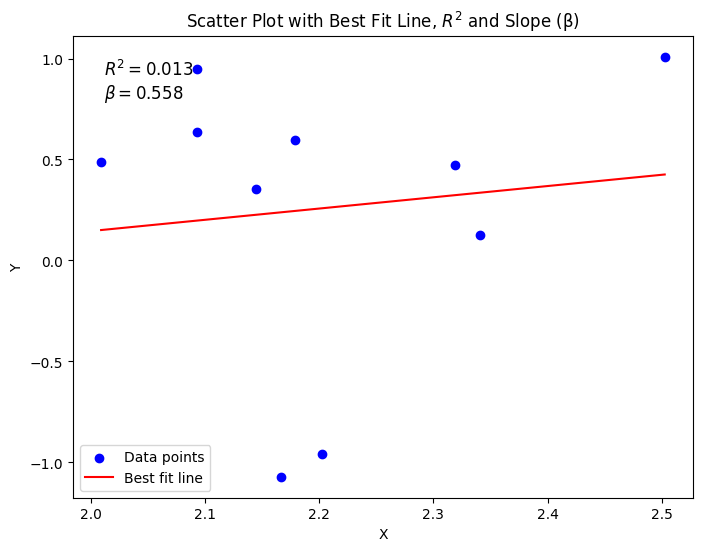

In [260]:
data = []
for stock_code, pnl, df in zip(selected_stock_codes, pnls, dfs):
    data.append({"stock_code": stock_code, 
                 "std": stds[stock_code], 
                 "pnl": pnl, 
                 "GMV": df['GMV'].max(), 
                 "max_postion":df['仓位'].max(), 
                 })

x = 0
for df in dfs:
    x += (df['涨跌幅']*0.01+1).cumprod().to_list()[-1]
print(x / len(dfs))

data = pd.DataFrame(data)
data['return'] = np.log(data['pnl'] / data['GMV'] - 0.4 + 1) 
# data = data[data['return']<3]
# data.plot.scatter(x='std', y='return')

import matplotlib.pyplot as plt
from scipy.stats import linregress
x, y = data['std'], data['return']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r_squared = r_value**2
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, slope * x + intercept, color='red', label='Best fit line')
plt.text(0.05, 0.95, f'$R^2 = {r_squared:.3f}$\n$\\beta = {slope:.3f}$', 
         transform=plt.gca().transAxes, 
         fontsize=12, 
         verticalalignment='top')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Best Fit Line, $R^2$ and Slope (β)')
plt.legend()
plt.show()

In [261]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to the data
model = LinearRegression()
reg = model.fit(x.to_numpy().reshape(-1, 1), y.to_numpy().reshape(-1, 1))
print(model)

# # Make predictions
# expected = dataset.target
# predicted = model.predict(dataset.data)

# # Summarize the fit of the model
# mse = np.mean((predicted-expected)**2)
# print model.intercept_, model.coef_, mse, 
# print(model.score(dataset.data, dataset.target))

LinearRegression()


In [262]:
import statsmodels.api as sm
from statsmodels.api import OLS
OLS(y.to_numpy().reshape(-1, 1),sm.add_constant(x.to_numpy().reshape(-1, 1))).fit().summary()

d:\Documents\miniconda3\envs\crawlerEnv\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                    0.1022
Date:                Thu, 14 Nov 2024   Prob (F-statistic):              0.757
Time:                        22:03:04   Log-Likelihood:                -10.309
No. Observations:                  10   AIC:                             24.62
Df Residuals:                       8   BIC:                             25.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9697      3.854     -0.252      0.808      -9.858       7.918
x1             0.5576      1.744      0.320      0.757      -3.465       4.580
==============================================================================
Omnibus:                        3.450   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                1.867
Skew:                          -1.044   Prob(JB):                        0.393
Kurtosis:                       2.653   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='std', ylabel='max_postion'>

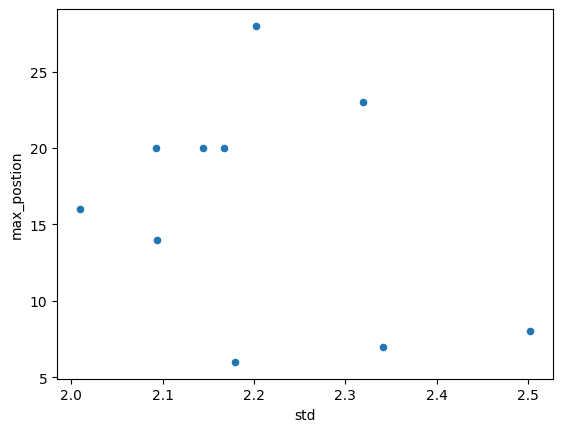

In [263]:
data.plot.scatter(x='std', y='max_postion')

<AxesSubplot:xlabel='std', ylabel='GMV'>

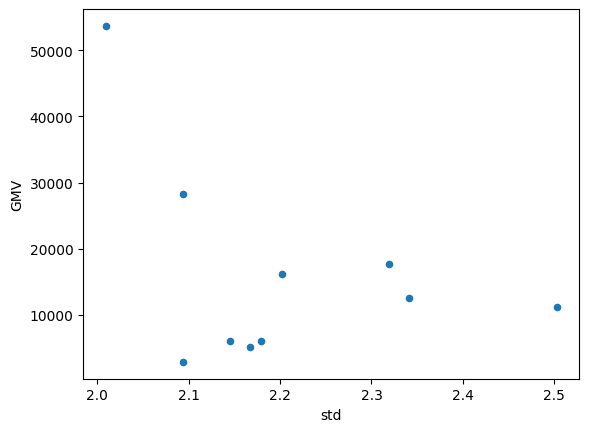

In [264]:
data[data['GMV']<100000].plot.scatter(x='std', y='GMV')

In [265]:
data['pnl'].sum() / data['GMV'].sum(), data['GMV'].sum() / 1e4, data['pnl'].sum() / 1e4

(1.0685650711901695, 15.9994, 17.0964)

In [266]:
data['pnl'].sum() / data['GMV'].sum(), data['GMV'].sum() / 1e4, data['pnl'].sum() / 1e4

(1.0685650711901695, 15.9994, 17.0964)

In [267]:
data.sort_values("return")

stock_code       std      pnl      GMV  max_postion    return
5     600136  2.166960  -1323.0   5143.0           20 -1.070733
3     002336  2.202481  -3497.0  16192.0           28 -0.957037
1     600129  2.341054   6774.0  12629.0            7  0.127852
6     600892  2.144712   5032.0   6120.0           20  0.352221
2     002654  2.319074  17794.0  17718.0           23  0.472681
9     600536  2.009233  55094.0  53675.0           16  0.486392
4     301339  2.178972   7373.0   6086.0            6  0.594138
7     002564  2.093516   3788.0   2929.0           14  0.638308
8     600418  2.093347  55844.0  28260.0           20  0.946269
0     688629  2.502552  24085.0  11242.0            8  1.008838

In [268]:
for fig in figs:
    fig.show()

In [222]:
for i, stock_code in enumerate(selected_stock_codes):
    if stock_code == "000158":
        figs[i].show()